In [1]:
import baseline
import importlib
importlib.reload(baseline)
from baseline import *
import numpy as np
import pandas as pd
from sklearn.model_selection import TimeSeriesSplit
from sklearn.metrics import root_mean_squared_error
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('full_data.csv')

In [3]:
reduce_mem_usage(data)
data.info()

Mem. usage decreased to 621.98 Mb (77.7% reduction)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11054182 entries, 0 to 11054181
Data columns (total 33 columns):
 #   Column                               Dtype  
---  ------                               -----  
 0   date_block_num                       int8   
 1   shop_id                              int8   
 2   item_cnt_month                       float16
 3   item_id                              int16  
 4   city_id                              int8   
 5   item_category_id                     int8   
 6   main_category_id                     int8   
 7   minor_category_id                    int8   
 8   shop_history                         int8   
 9   item_history                         float16
 10  minor_category_history               int8   
 11  first_sales_date_block               float16
 12  avg_item_cnt_per_cat_lag_1           float16
 13  avg_item_cnt_per_shop_lag_1          float16
 14  avg_item_cnt_per_item_lag_1 

LinearRegression

LinearRegression
RMSE for split 1: 0.753
RMSE for split 2: 0.700
RMSE for split 3: 0.675
Mean RMSE for all splits: 0.710


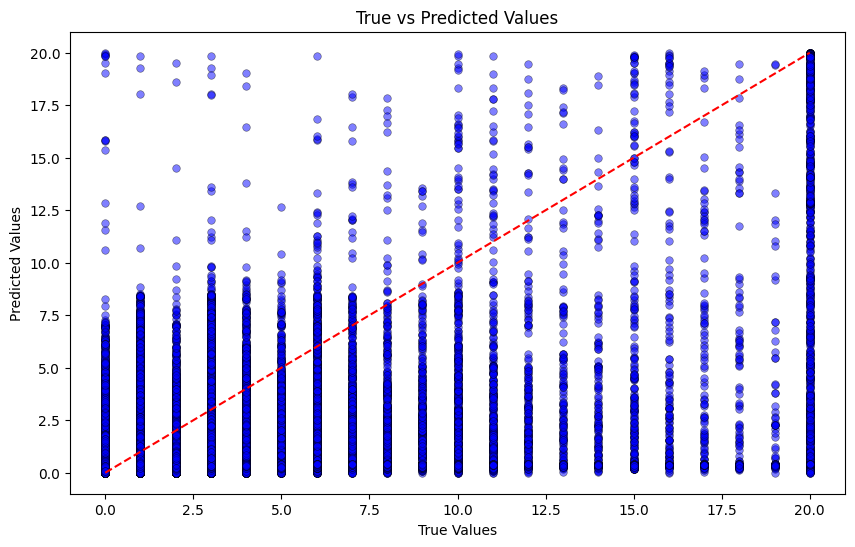

In [152]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LinearRegression())
true_pred_plot(y_val, y_pred)

In [153]:
X_test = data[data.date_block_num == 34].drop('item_cnt_month', axis = 1)

X = data[data.date_block_num != 34].drop('item_cnt_month', axis = 1)
y = data[data.date_block_num != 34]['item_cnt_month']

In [154]:
model = LinearRegression()
model.fit(X, y)
prediction(X_test, model)

'Submission file created'

Linear Regression. Submission score: 1.07284

XGBRegressor

XGBRegressor
RMSE for split 1: 0.729
RMSE for split 2: 0.673
RMSE for split 3: 0.701
Mean RMSE for all splits: 0.701


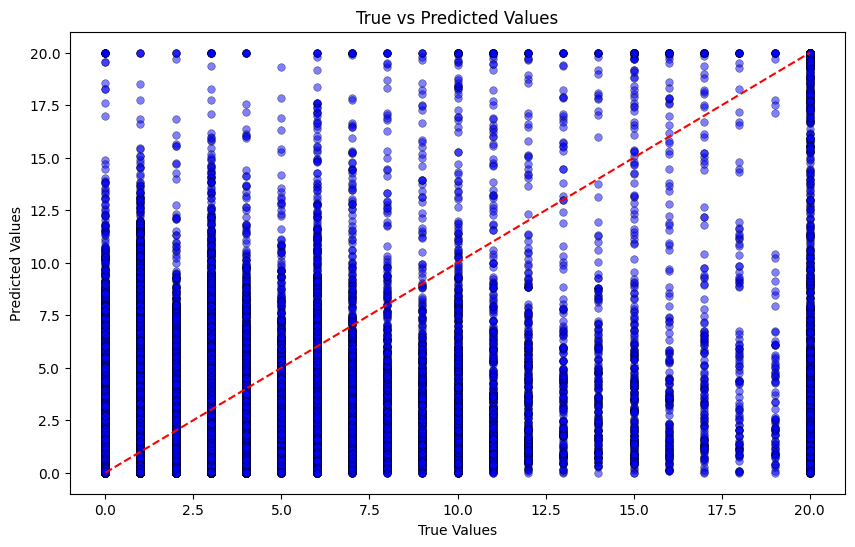

In [155]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = XGBRegressor())
true_pred_plot(y_val, y_pred)

In [ ]:
X_train, y_train, X_val, y_val, X_test = data_split(data)
model = XGBRegressor(n_estimators = 75, eval_metric="rmse", early_stopping_rounds = 20)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train,y_train, eval_set=eval_set, verbose=True)
prediction(X_test, model)

[0]	validation_0-rmse:0.75094	validation_1-rmse:0.79977
[1]	validation_0-rmse:0.71559	validation_1-rmse:0.77916
[2]	validation_0-rmse:0.69399	validation_1-rmse:0.76576
[3]	validation_0-rmse:0.68283	validation_1-rmse:0.76038
[4]	validation_0-rmse:0.67412	validation_1-rmse:0.75403
[5]	validation_0-rmse:0.66822	validation_1-rmse:0.74990
[6]	validation_0-rmse:0.66401	validation_1-rmse:0.75246
[7]	validation_0-rmse:0.66094	validation_1-rmse:0.75191
[8]	validation_0-rmse:0.65829	validation_1-rmse:0.75238
[9]	validation_0-rmse:0.65569	validation_1-rmse:0.74988
[10]	validation_0-rmse:0.65364	validation_1-rmse:0.74934
[11]	validation_0-rmse:0.65224	validation_1-rmse:0.74858
[12]	validation_0-rmse:0.65081	validation_1-rmse:0.74818
[13]	validation_0-rmse:0.64739	validation_1-rmse:0.74265
[14]	validation_0-rmse:0.64574	validation_1-rmse:0.74220
[15]	validation_0-rmse:0.64382	validation_1-rmse:0.74319
[16]	validation_0-rmse:0.64276	validation_1-rmse:0.74383
[17]	validation_0-rmse:0.64151	validation

'Submission file created'

XGBRegression. Submission score: 1.01621

Higher submission score for Linear Regression means, that our data have data leakage.

LightGBM

LGBMRegressor
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.093312 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3152
[LightGBM] [Info] Number of data points in the train set: 2709997, number of used features: 34
[LightGBM] [Info] Start training from score 0.205220
RMSE for split 1: 0.712
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.192181 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3485
[LightGBM] [Info] Number of data points in the train set: 5419992, number of used features: 35
[LightGBM] [Info] Start training from score 0.211200
RMSE for split 2: 0.662
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.334839 seconds.
You can set `force

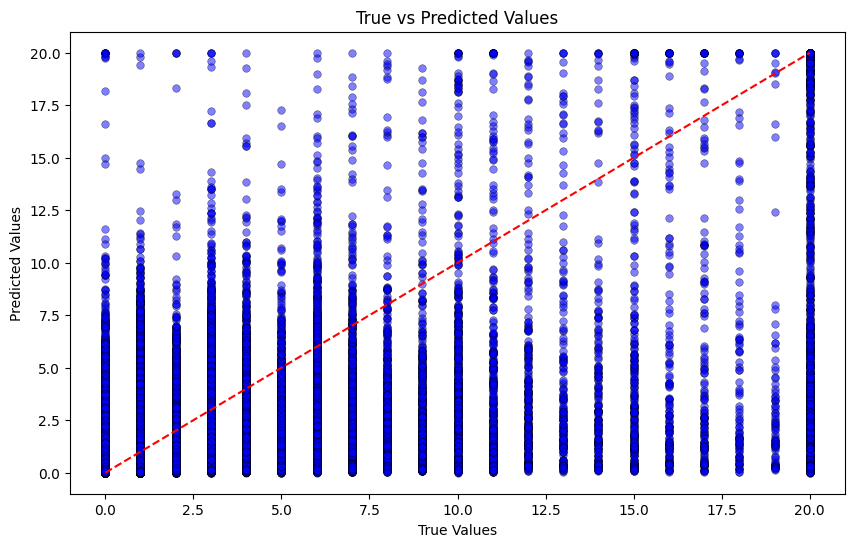

In [157]:
y_val, y_pred, model = tss_cv(df = data, n_splits = 3, model = LGBMRegressor())
true_pred_plot(y_val, y_pred)

In [160]:
model = LGBMRegressor()
X_train, y_train, X_val, y_val, X_test = data_split(data)
model.fit(X_train, y_train, eval_set=[(X_train, y_train), (X_val, y_val)])
prediction(X_test, model)

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.319640 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 3734
[LightGBM] [Info] Number of data points in the train set: 10601854, number of used features: 35
[LightGBM] [Info] Start training from score 0.206610


'Submission file created'

LightGBM. Submission score: 1.02110

In [4]:
results = feature_importancy_check(df = data)

Feature importance evaluation: 100%|███████| 17/17 [08:21<00:00, 29.50s/it]

Feature: item_cnt_month_lag_6, RMSE: 0.7423210762023654, Importance: 14.22%
Feature: sales_per_item_lag_1, RMSE: 0.7444602198463608, Importance: 15.51%
Feature: item_cnt_month_lag_3, RMSE: 0.745894056319268, Importance: 20.05%
Feature: item_cnt_month_lag_1, RMSE: 0.7460005051721609, Importance: 35.37%
Feature: item_cnt_month_lag_12, RMSE: 0.7465100641261303, Importance: 12.16%
Feature: avg_item_cnt_per_item_lag_1, RMSE: 0.7475274677173132, Importance: 26.19%
Feature: avg_item_cnt_per_shop_lag_1, RMSE: 0.7475835717958228, Importance: 9.11%
Feature: item_cnt_month_lag_2, RMSE: 0.7484076504603766, Importance: 22.94%
Feature: avg_item_cnt_per_cat_per_shop_lag_1, RMSE: 0.7504656542296064, Importance: 17.71%
Feature: avg_item_cnt_per_cat_lag_1, RMSE: 0.7518861832297312, Importance: 12.29%
Feature: med_item_cnt_per_cat_per_shop_lag_1, RMSE: 0.7542359903483934, Importance: 30.22%
Feature: avg_item_cnt_per_minor_cat_lag_1, RMSE: 0.7544085643008106, Importance: 13.17%
Feature: Baseline, RMSE: 0.

In [5]:
results_df = pd.DataFrame(results, columns=['Feature', 'RMSE', 'Feature_Importance'])

# Convert RMSE and Feature Importance columns to numeric types
results_df['RMSE'] = pd.to_numeric(results_df['RMSE'])
results_df['Feature_Importance'] = pd.to_numeric(results_df['Feature_Importance'])
results_df.sort_values('Feature_Importance', ascending = False)

,Feature,RMSE,Feature_Importance
3,item_cnt_month_lag_1,0.746001,35.373833
10,med_item_cnt_per_cat_per_shop_lag_1,0.754236,30.221996
5,avg_item_cnt_per_item_lag_1,0.747527,26.194117
7,item_cnt_month_lag_2,0.748408,22.938473
2,item_cnt_month_lag_3,0.745894,20.054913
8,avg_item_cnt_per_cat_per_shop_lag_1,0.750466,17.713591
12,Baseline,0.755532,15.703310
1,sales_per_item_lag_1,0.744460,15.511539
0,item_cnt_month_lag_6,0.742321,14.217596
11,avg_item_cnt_per_minor_cat_lag_1,0.754409,13.167856


<Axes: >

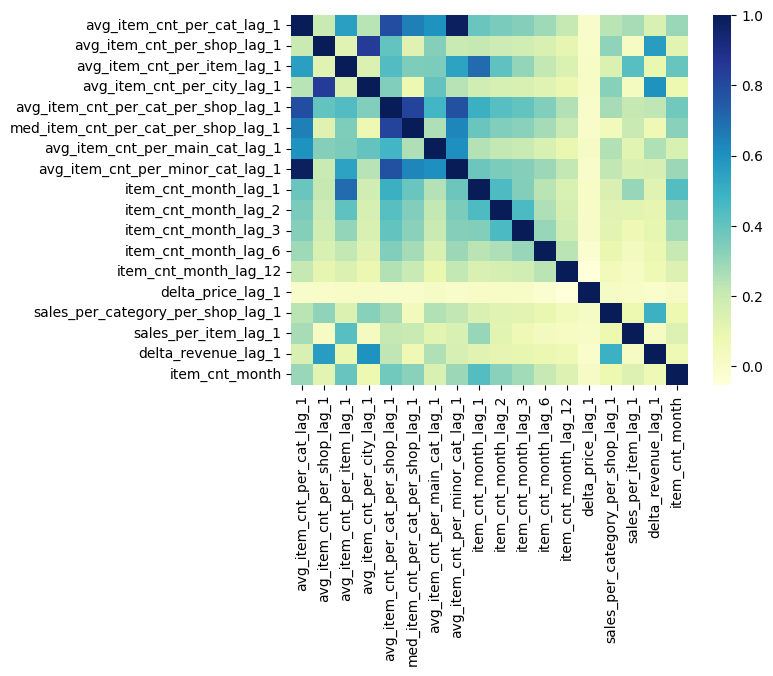

In [6]:
lag_columns = list(data.loc[:, data.columns.str.contains('_lag_')].columns)
sns.heatmap(data.loc[:, lag_columns+['item_cnt_month']].corr(), cmap="YlGnBu")

In [7]:
data.columns

Index(['date_block_num', 'shop_id', 'item_cnt_month', 'item_id', 'city_id',
       'item_category_id', 'main_category_id', 'minor_category_id',
       'shop_history', 'item_history', 'minor_category_history',
       'first_sales_date_block', 'avg_item_cnt_per_cat_lag_1',
       'avg_item_cnt_per_shop_lag_1', 'avg_item_cnt_per_item_lag_1',
       'avg_item_cnt_per_city_lag_1', 'avg_item_cnt_per_cat_per_shop_lag_1',
       'med_item_cnt_per_cat_per_shop_lag_1',
       'avg_item_cnt_per_main_cat_lag_1', 'avg_item_cnt_per_minor_cat_lag_1',
       'item_cnt_month_lag_1', 'item_cnt_month_lag_2', 'item_cnt_month_lag_3',
       'item_cnt_month_lag_6', 'item_cnt_month_lag_12', 'delta_price_lag_1',
       'sales_per_category_per_shop_lag_1', 'sales_per_item_lag_1',
       'item_shop_first_sale', 'item_first_sale', 'delta_revenue_lag_1',
       'months_from_last_sale', 'months_from_first_sale'],
      dtype='object')

In [13]:
experiment = data.copy()

In [14]:
experiment.drop(['avg_item_cnt_per_cat_per_shop_lag_1', 'avg_item_cnt_per_cat_lag_1'], axis = 1, inplace = True)

<Axes: >

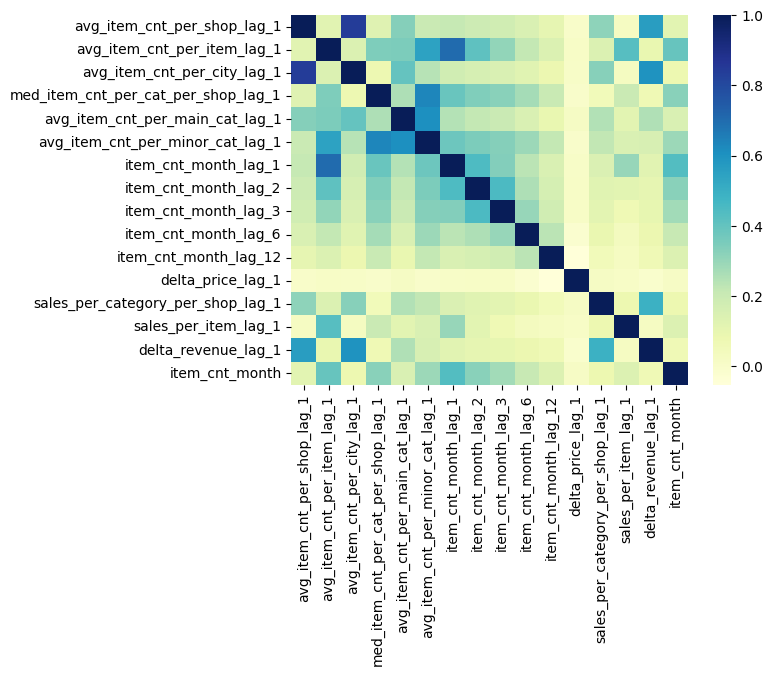

In [15]:
lag_columns = list(experiment.loc[:, experiment.columns.str.contains('_lag_')].columns)
sns.heatmap(data.loc[:, lag_columns+['item_cnt_month']].corr(), cmap="YlGnBu")

In [16]:
X_train, y_train, X_val, y_val, X_test = data_split(experiment)
model = XGBRegressor(n_estimators = 75, eval_metric="rmse", early_stopping_rounds = 20)
eval_set = [(X_train, y_train), (X_val, y_val)]
model.fit(X_train,y_train, eval_set=eval_set, verbose=True)
prediction(X_test, model)

[0]	validation_0-rmse:0.75130	validation_1-rmse:0.79952
[1]	validation_0-rmse:0.71413	validation_1-rmse:0.77527
[2]	validation_0-rmse:0.69464	validation_1-rmse:0.76246
[3]	validation_0-rmse:0.68246	validation_1-rmse:0.75654
[4]	validation_0-rmse:0.67460	validation_1-rmse:0.75403
[5]	validation_0-rmse:0.66885	validation_1-rmse:0.74884
[6]	validation_0-rmse:0.66543	validation_1-rmse:0.74741
[7]	validation_0-rmse:0.66231	validation_1-rmse:0.74789
[8]	validation_0-rmse:0.65893	validation_1-rmse:0.75070
[9]	validation_0-rmse:0.65597	validation_1-rmse:0.75091
[10]	validation_0-rmse:0.65437	validation_1-rmse:0.74939
[11]	validation_0-rmse:0.65304	validation_1-rmse:0.74901
[12]	validation_0-rmse:0.65154	validation_1-rmse:0.75077
[13]	validation_0-rmse:0.65003	validation_1-rmse:0.75050
[14]	validation_0-rmse:0.64857	validation_1-rmse:0.75236
[15]	validation_0-rmse:0.64626	validation_1-rmse:0.75044
[16]	validation_0-rmse:0.64343	validation_1-rmse:0.74625
[17]	validation_0-rmse:0.64166	validation

'Submission file created'